<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Online%20Courses/Introduction%20To%20Machine%20Learning/Introduction_To_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Batch Gradient Descent

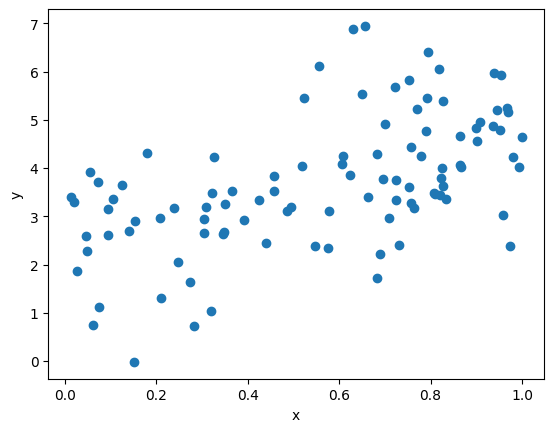

In [18]:
#Batch Gradient Descent
import numpy as np
import matplotlib.pyplot as plt
#Genterate linear data
x=np.random.rand(100,1)
y=2+3*x+np.random.randn(100,1)
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Fitted Parameters are: [[2.23619163]
 [2.58428352]]
Mean squared Error: 1.3798222149895272
Score: [[0.32569172]]


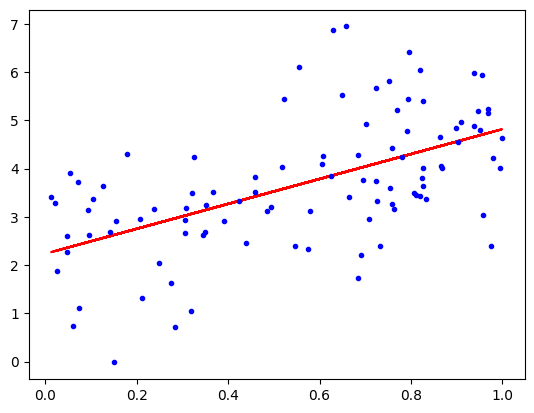

In [19]:
from sklearn.model_selection import train_test_split

x1=x.reshape(-1,1)
y1=y.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.2)
X=np.c_[np.ones((80,1)),X_train] #Add ones(for getting intercept)
theta=np.random.randn(2,1)  #Initialize random theta
m=80                       #No. of instances
eta=0.1
no_of_iterations=1000
for i in range(no_of_iterations):
  gradient=(2/m)*X.T@(X@theta-Y_train)
  theta=theta-eta*gradient
print("Fitted Parameters are:",theta)
Xt=np.c_[np.ones((100,1)),x]
Xt1=np.c_[np.ones((20,1)),X_test]
y_hat=Xt@theta
y_hat1=Xt1@theta
from sklearn.metrics import mean_squared_error
print("Mean squared Error:",mean_squared_error(Y_test.ravel(),y_hat1.ravel()))
score=((y_hat-y.mean()).T@(y_hat-y.mean()))/((y-y.mean()).T@(y-y.mean()))
print("Score:",score)
plt.plot(x,y_hat.ravel(),'r-')
plt.plot(x,y,'b.')
plt.show()

In [20]:
#The usual method using normal equation
from sklearn.linear_model import LinearRegression     #Uses Normal Equation
reg=LinearRegression()
reg.fit(X,Y_train.ravel())
print("Parameters are:",reg.intercept_,reg.coef_[1])

Parameters are: 2.236190611934008 2.5842852235967086


###Stochastic Gradient Descent

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty=None, eta0=0.1)
sgd_reg.fit(X, Y_train.ravel())
print("Parameters are:",sgd_reg.coef_)

Parameters are: [1.16972337 2.33513602]


In case of polynomial regression, for multiple features; regularization techniques can be applied to the SGDRegressor as follows:

Use penalty='l1' for Lasso regression

Use penalty='l2' for Ridge regression

Use penalty='elasticnet' with l1_ratio=x where x->(0,1) for Elastic Net

Use early_stopping=True to enable early stopping

###Logistic Regression

In [22]:
import pandas as pd
import numpy as np
x1=np.random.randint(low=1,high=100,size=100)
x2=np.random.randint(low=1,high=10,size=100)
x3=np.random.randint(low=11,high=20,size=100)
y=np.random.randint(low=0,high=3,size=100)
df=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'y':y})
df

,x1,x2,x3,y
0,61,8,11,1
1,87,3,19,0
2,73,6,12,1
3,67,5,18,0
4,43,2,12,0
...,...,...,...,...
95,49,2,11,0
96,5,5,11,0
97,65,1,12,0
98,35,5,17,0


In [23]:
#Fit a softmax regression model(multinomial logistic regression)
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs')
X_train,X_test,Y_train,Y_test=train_test_split(df[['x1','x2','x3']].values,y,test_size=0.2)
softmax_reg.fit(X_train,np.ravel(Y_train))
print("Coefficients for class 0:",softmax_reg.coef_[0])
print("Coefficients for class 1:",softmax_reg.coef_[1])
print("Coefficients for class 2:",softmax_reg.coef_[2])
print(softmax_reg.predict([[1,2,15]]))

Coefficients for class 0: [-0.002603   -0.2740324   0.04491422]
Coefficients for class 1: [ 0.00676885  0.24220975 -0.0379169 ]
Coefficients for class 2: [-0.00416585  0.03182265 -0.00699731]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Performance
from sklearn.metrics import classification_report
y_hat=softmax_reg.predict(X_test)
print(classification_report(Y_test,y_hat))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.29      0.50      0.36         4
           2       0.33      0.29      0.31         7

    accuracy                           0.45        20
   macro avg       0.44      0.45      0.43        20
weighted avg       0.50      0.45      0.46        20



###Linear Discriminant Analysis(LDA)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(df[['x1','x2','x3']].values, y)
print("Coefficients for class 0:",clf.coef_[0])
print("Coefficients for class 1:",clf.coef_[1])
print("Coefficients for class 2:",clf.coef_[2])
print(clf.predict([[1,2,15]]))

Coefficients for class 0: [-0.00387201 -0.22681909  0.04044182]
Coefficients for class 1: [ 0.01051759  0.20939544 -0.02646234]
Coefficients for class 2: [-0.0039067   0.06013135 -0.01844686]
[0]


###Perceptron Learning(A simple classifier that works for linearly separable data)

In [26]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
#For previous example the fit is very bad.
clf.fit(df[['x1','x2','x3']].values, y)
print("Coefficients for class 0:",clf.coef_[0])
print("Coefficients for class 1:",clf.coef_[1])
print("Coefficients for class 2:",clf.coef_[2])
print(clf.predict([[1,2,15]]))

Coefficients for class 0: [  -1. -234.   55.]
Coefficients for class 1: [ -26.  176. -101.]
Coefficients for class 2: [-46. 116. -53.]
[0]


In [27]:
#Test for well seperated data
l1=np.hstack((np.random.randint(low=1,high=10,size=50),np.random.randint(low=11,high=20,size=50)))
l2=np.hstack((np.zeros(50),np.ones(50)))
df1=pd.DataFrame({'x1':l1,'y':l2})
print(df1)

    x1    y
0    9  0.0
1    9  0.0
2    1  0.0
3    2  0.0
4    2  0.0
..  ..  ...
95  18  1.0
96  11  1.0
97  15  1.0
98  17  1.0
99  15  1.0

[100 rows x 2 columns]


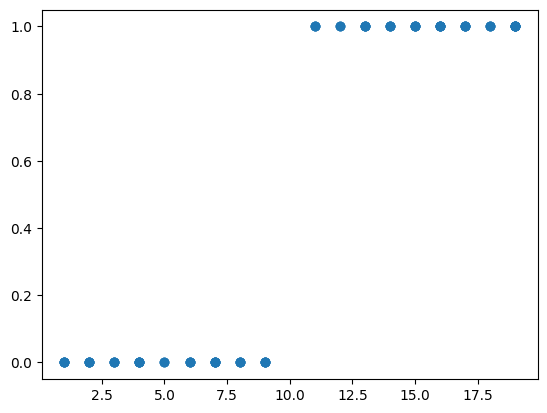

In [28]:
#Visualize
plt.scatter(df1['x1'],df1['y'])
plt.show()

In [29]:
clf1=SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
X_train,X_test,Y_train,Y_test=train_test_split(df1[['x1']].values,df1['y'].values,test_size=0.2)
clf1.fit(X_train, np.ravel(Y_train))
print("Coefficients for class 0:",clf1.intercept_,clf1.coef_[0])
print(clf1.predict([[6]]))

Coefficients for class 0: [-19.] [2.]
[0.]


In [30]:
y_hat=clf1.predict(X_test)
print(classification_report(Y_test,y_hat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



###Support Vector Machine(SVM):

In [31]:
from sklearn.svm import LinearSVC
clf2=LinearSVC()
clf2.fit(X_train, np.ravel(Y_train))
print("Coefficients for class 0:",clf1.intercept_,clf1.coef_[0])
print(clf1.predict([[6]]))

Coefficients for class 0: [-19.] [2.]
[0.]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
#Checking support vectors for given data. We use a polynomial kernel with specified parameters
from sklearn.svm import SVC
x=np.array([1,2,3,4,7,8,9,10]).reshape(-1,1)
y=np.array([1,0,0,0,0,1,1,1])
clf=SVC(kernel='poly',degree =3,C=1, gamma =0.1)
clf.fit(x,y)
print(clf.support_vectors_)

[[4.]
 [7.]
 [1.]
 [8.]]


In [33]:
#Training a linear perceptron on modified iris dataset
df1=pd.read_csv("https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Intro_ML/irisX.csv")
df2=pd.read_csv("https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Intro_ML/irisY.csv")
df=pd.concat([df1,df2],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df[list(df1.columns)].values,df['y'].values,test_size=0.33)
clf=SGDClassifier(loss='perceptron',penalty='l1')
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        20
           2       1.00      0.91      0.95        11

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [34]:
#Considering the same example as above, we fit a polynomial kernel with specified parameters
#To find an optimal value of the C hyperparameter we use GridSearchCV which is basically exhaustive searching(testing) with the list of C values.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
clf=OneVsRestClassifier(GridSearchCV(SVC(kernel='poly',gamma=0.4),{'C':[0.1,0.9,10,0.000001]}))
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.90      0.90        20
           2       0.82      0.82      0.82        11

    accuracy                           0.92        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.92      0.92      0.92        50



###Enssemble Methods:Use a collection of classifiers/regressors whose combined performance is much greater than the individual ones. We have several such methods such as bagging, boosting(AdaBoost and Gradient Boost) and Random Forests. Here, an example for the random forests is shown on the iris dataset. The same procedure applies for training classfiers using the above mentioned algorithms.

In [35]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=20)
rnd_clf.fit(x_train,y_train)
y_predict=rnd_clf.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.89      0.85      0.87        20
           2       0.75      0.82      0.78        11

    accuracy                           0.90        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.90      0.90      0.90        50



##Naive Bayes Classifier:

In [36]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Intro_ML/weather.csv")
df['Outlook']=LabelEncoder().fit_transform(df['Outlook'])
df['Windy']=LabelEncoder().fit_transform(df['Windy'])
df['Play']=LabelEncoder().fit_transform(df['Play'])
l=list(df.columns)
X=df[l[:len(l)-1]]
Y=df[l[-1]]
clf = MultinomialNB()
clf.fit(X.values, Y.values)
print(clf.predict_proba([[2,66,90,1]]))

[[0.63885202 0.36114798]]


In [37]:
!pip install mixed-naive-bayes

In [38]:
from mixed_naive_bayes import MixedNB
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/Datasets/Intro_ML/weather.csv")
df['Outlook']=LabelEncoder().fit_transform(df['Outlook'])
df['Windy']=LabelEncoder().fit_transform(df['Windy'])
df['Play']=LabelEncoder().fit_transform(df['Play'])
l=list(df.columns)
X=df[l[:len(l)-1]]
Y=df[l[-1]]
clf = MixedNB(categorical_features=[0,3])
clf.fit(X,Y)
print(clf.predict_proba([[2,66,90,1]]))

[[0.76367893 0.23632107]]


##Clustering:

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import numpy as np
data, labels = load_digits(return_X_y=True)
seed=np.random.seed(42)
kmeans=KMeans(n_clusters=10,random_state=seed)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [40]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  2.23463687e-02,  4.22905028e+00,
         1.31396648e+01,  1.12681564e+01,  2.93854749e+00,
         3.35195531e-02, -5.55111512e-17, -1.73472348e-18,
         8.82681564e-01,  1.26201117e+01,  1.33687151e+01,
         1.14078212e+01,  1.13687151e+01,  9.60893855e-01,
         2.77555756e-17, -8.67361738e-19,  3.72625698e+00,
         1.42122905e+01,  5.25139665e+00,  2.10614525e+00,
         1.21173184e+01,  3.53072626e+00,  1.04083409e-16,
        -1.30104261e-18,  5.29608939e+00,  1.26424581e+01,
         2.03351955e+00,  2.29050279e-01,  9.07821229e+00,
         6.47486034e+00, -2.60208521e-18,  0.00000000e+00,
         5.88268156e+00,  1.14916201e+01,  8.65921788e-01,
         3.35195531e-02,  8.81005587e+00,  7.15083799e+00,
         0.00000000e+00, -1.04083409e-17,  3.51396648e+00,
         1.32849162e+01,  1.65921788e+00,  1.49162011e+00,
         1.13519553e+01,  5.84357542e+00, -1.04083409e-17,
        -4.33680869e-18,  8.04469274e-01,  1.31117318e+0

In [41]:
print(labels)

[0 1 2 ... 8 9 8]


In [42]:
for i in range(100):
  print(labels[i],kmeans.labels_[i])

0 0
1 5
2 5
3 9
4 6
5 1
6 4
7 8
8 1
9 1
0 0
1 3
2 2
3 9
4 6
5 7
6 4
7 8
8 5
9 1
0 0
1 3
2 2
3 9
4 6
5 7
6 4
7 3
8 5
9 1
0 0
9 1
5 7
5 7
6 4
5 7
0 0
9 1
8 5
9 1
8 5
4 6
1 3
7 8
7 8
3 9
5 7
1 3
0 0
0 0
2 5
2 5
7 8
8 5
2 3
0 0
1 3
2 5
6 4
3 9
3 9
7 8
3 9
3 9
4 6
6 4
6 4
6 4
4 6
9 8
1 3
5 7
0 0
9 1
5 7
2 3
8 5
2 3
0 0
0 0
1 3
7 8
6 4
3 9
2 2
1 5
7 8
4 6
6 4
3 9
1 3
3 9
9 9
1 5
7 8
6 5
8 5
4 6
3 9
1 5


In [43]:
from sklearn.metrics import classification_report
print(classification_report(labels,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.00      0.00      0.00       182
           2       0.85      0.84      0.84       177
           3       0.00      0.00      0.00       183
           4       0.00      0.00      0.00       181
           5       0.00      0.00      0.00       182
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00       179
           8       0.02      0.02      0.02       174
           9       0.04      0.04      0.04       180

    accuracy                           0.19      1797
   macro avg       0.19      0.19      0.19      1797
weighted avg       0.19      0.19      0.19      1797



In [44]:
kmeans.score(data)

-1165725.1115285032

In [45]:
from sklearn.metrics.cluster import rand_score
rand_score(labels,kmeans.labels_)

0.938778191318617

In [46]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(labels,kmeans.labels_)

0.18924176091983208

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels,kmeans.labels_)

array([[177,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,  24,  54,   2, 100,   0,   1,   0,   1],
       [  1,   2, 148,   3,   0,   8,   0,   0,   2,  13],
       [  0,  12,   0,   0,   0,   7,   0,   2,   6, 156],
       [  0,   0,   0,   2,   0,   2, 166,   0,  11,   0],
       [  0,  41,   0,   0,   1,   0,   2, 136,   0,   2],
       [  1,   0,   0,   0, 177,   3,   0,   0,   0,   0],
       [  0,   0,   0,  10,   0,   2,   0,   0, 167,   0],
       [  0,  50,   3,   9,   2, 100,   0,   4,   4,   2],
       [  0, 139,   0,  20,   0,   1,   0,   5,   8,   7]])

In [48]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(labels,kmeans.labels_)

array([[177,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,  24,  54,   2, 100,   0,   1,   0,   1],
       [  1,   2, 148,   3,   0,   8,   0,   0,   2,  13],
       [  0,  12,   0,   0,   0,   7,   0,   2,   6, 156],
       [  0,   0,   0,   2,   0,   2, 166,   0,  11,   0],
       [  0,  41,   0,   0,   1,   0,   2, 136,   0,   2],
       [  1,   0,   0,   0, 177,   3,   0,   0,   0,   0],
       [  0,   0,   0,  10,   0,   2,   0,   0, 167,   0],
       [  0,  50,   3,   9,   2, 100,   0,   4,   4,   2],
       [  0, 139,   0,  20,   0,   1,   0,   5,   8,   7]])

In [49]:
from sklearn.cluster import Birch
birch=Birch(n_clusters=10,threshold=1)
birch.fit(data)

Birch(n_clusters=10, threshold=1)

In [50]:
rand_score(labels,birch.labels_)

0.9612333349445314

In [51]:
data, labels = load_digits(return_X_y=True)


In [52]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(data)
data=pca.transform(data)

In [53]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=0.5,min_samples=5)
dbs.fit(data)

DBSCAN()

In [54]:
list(dbs.labels_).count(-1)

1742